In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

In [2]:
data_all_years = pandas.read_csv('data_all.csv',sep=',')
data_all_years.head()
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years = data_all_years.drop(data_all_years.index[569])
data_all_years[565:575]

,last_name,first_name,year,xba,xslg,xwoba,xobp,xiso,exit_velocity_avg,launch_angle_avg,...,popups,n_bolts,hp_to_1b,sprint_speed,OPS_Plus_Name,OPS_Plus,UBR_Name,UBR,wRC_Plus_Name,wRC_Plus
565,Votto,Joey,2018.0,0.288,0.484,0.398,0.422,0.196,88.1,13.4,...,4.0,0.0,4.72,25.4,Joey Votto*\vottojo01,126.0,Votto,-3.0,Votto,130.0
566,Wendle,Joey,2018.0,0.264,0.378,0.312,0.326,0.115,88.8,10.7,...,28.0,0.0,4.16,28.3,Joey Wendle*\wendljo01,118.0,Wendle,1.3,Wendle,117.0
567,Yelich,Christian,2018.0,0.323,0.575,0.422,0.402,0.252,92.6,5.0,...,13.0,47.0,4.18,28.7,Christian Yelich*\yelicch01,164.0,Yelich,4.2,Yelich,166.0
568,Zobrist,Ben,2018.0,0.277,0.400,0.340,0.357,0.122,89.9,9.0,...,14.0,0.0,4.36,26.7,Ben Zobrist#\zobribe01,117.0,Zobrist,1.9,Zobrist,123.0
571,Abreu,Jose,2019.0,0.282,0.522,0.363,0.335,0.240,92.1,10.9,...,29.0,0.0,4.47,26.6,Abreu\abreujo02,118.0,Abreu,-3.0,Abreu,117.0
572,Acuna Jr.,Ronald,2019.0,0.282,0.578,0.393,0.368,0.296,90.6,14.2,...,21.0,47.0,4.18,29.4,Acuna Jr.\acunaro01,121.0,Acuna Jr.,4.6,Acuna Jr.,126.0
573,Adames,Willy,2019.0,0.254,0.446,0.326,0.317,0.192,88.5,10.8,...,16.0,0.0,4.27,28.3,Adames\adamewi01,96.0,Adames,1.8,Adames,97.0
574,Ahmed,Nick,2019.0,0.261,0.432,0.326,0.327,0.171,87.8,7.6,...,20.0,2.0,4.35,28.2,Ahmed\ahmedni01,92.0,Ahmed,2.4,Ahmed,91.0
575,Alberto,Hanser,2019.0,0.283,0.401,0.308,0.309,0.119,84.4,11.8,...,26.0,0.0,4.33,26.8,Alberto\alberha01,98.0,Alberto,-0.2,Alberto,96.0
576,Albies,Ozzie,2019.0,0.292,0.497,0.356,0.350,0.205,88.9,15.6,...,28.0,20.0,4.02,28.6,Albies#\albieoz01,113.0,Albies,1.6,Albies,117.0


In [3]:
predictors = ['exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent', 'barrels', 'barrel_batted_rate','solidcontact_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent', 'hard_hit_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'out_zone_swing_miss', 'out_zone_swing', 'out_zone_percent', 'out_zone', 'meatball_swing_percent', 'meatball_percent','pitch_count_offspeed', 'pitch_count_fastball', 'pitch_count_breaking', 'pitch_count','iz_contact_percent', 'in_zone_swing_miss', 'in_zone_swing', 'in_zone_percent', 'in_zone', 'edge_percent', 'edge', 'whiff_percent', 'swing_percent', 'pull_percent', 'straightaway_percent', 'opposite_percent', 'batted_ball', 'f_strike_percent', 'groundballs_percent', 'groundballs','flyballs_percent', 'flyballs', 'linedrives_percent', 'linedrives', 'popups_percent', 'popups', 'n_bolts', 'sprint_speed', 'UBR']
len(predictors)

51

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


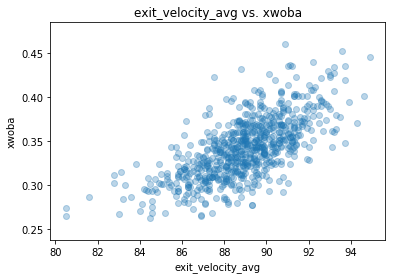

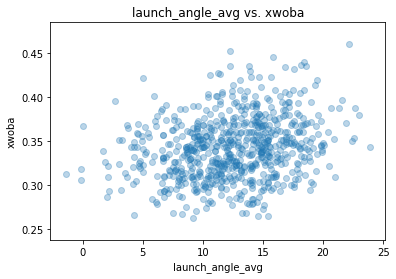

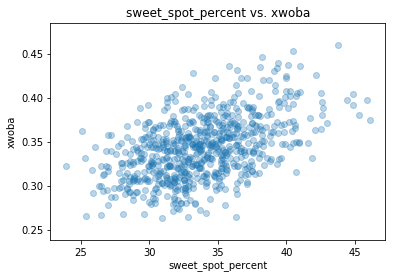

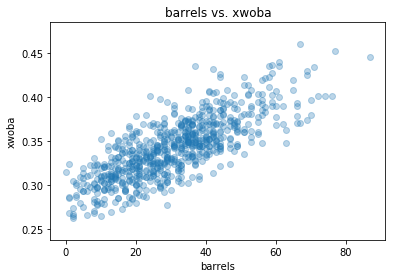

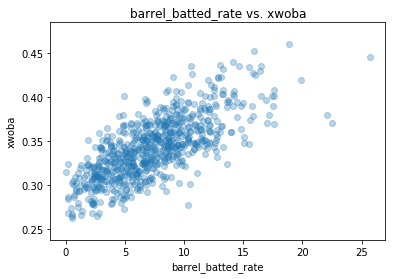

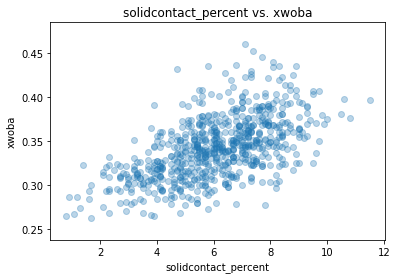

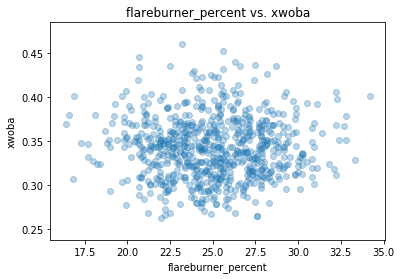

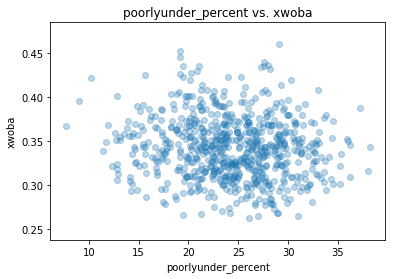

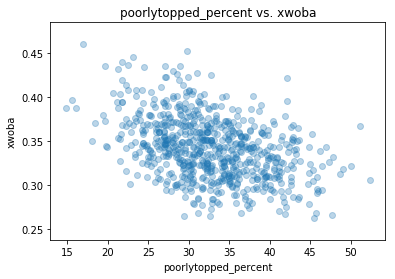

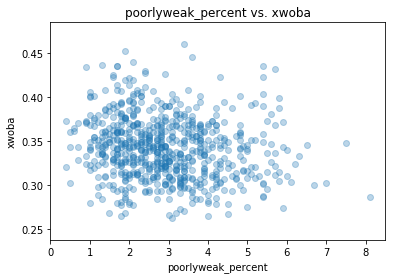

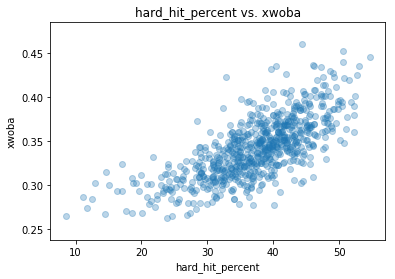

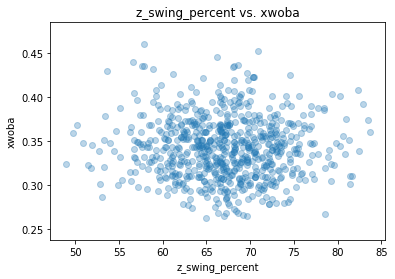

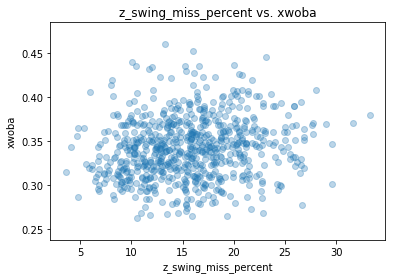

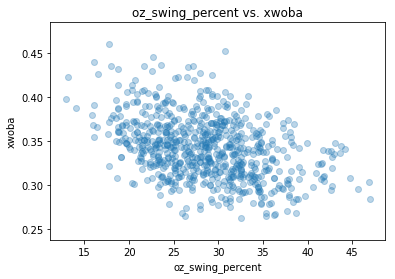

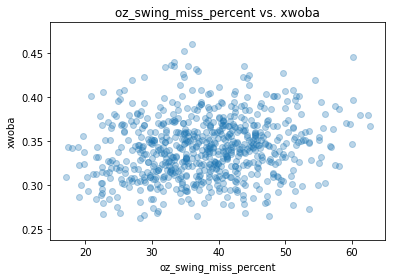

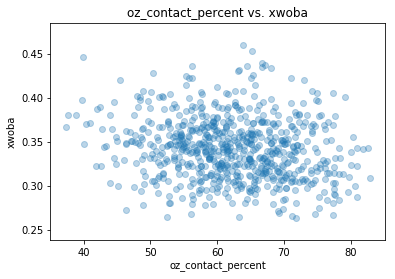

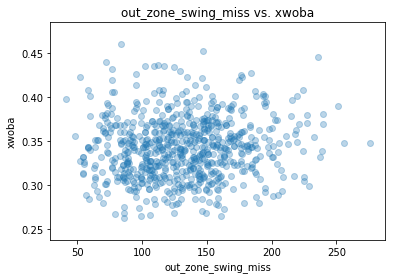

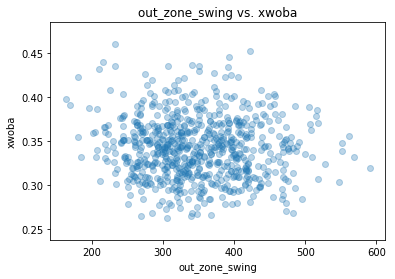

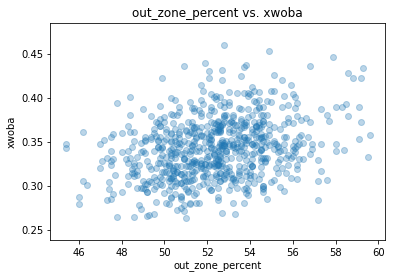

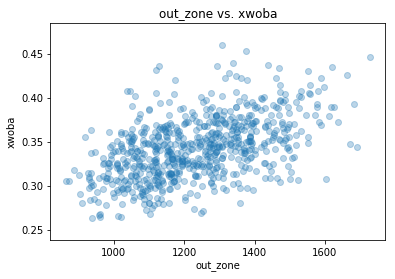

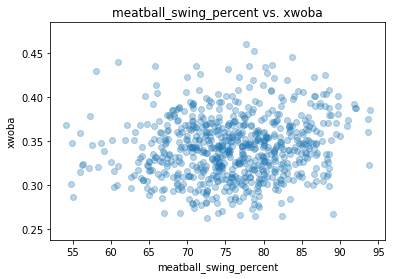

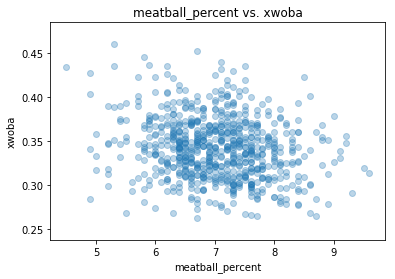

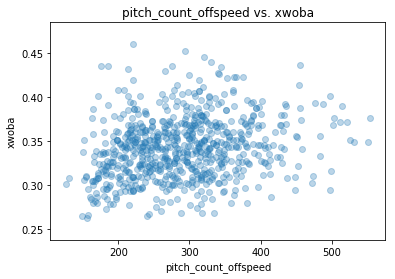

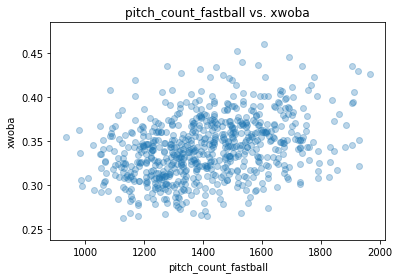

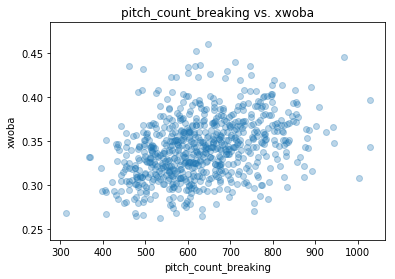

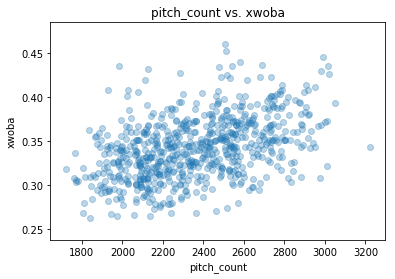

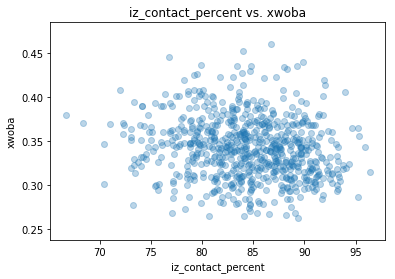

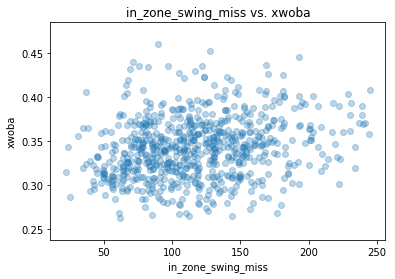

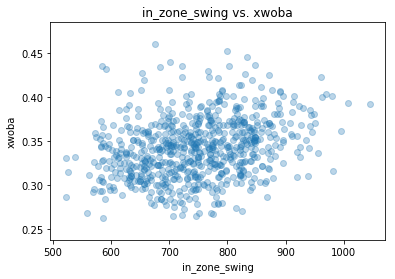

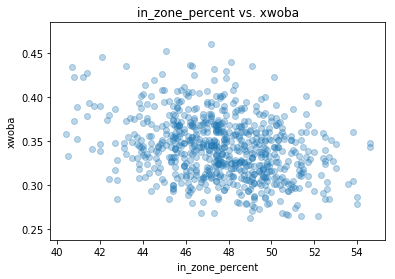

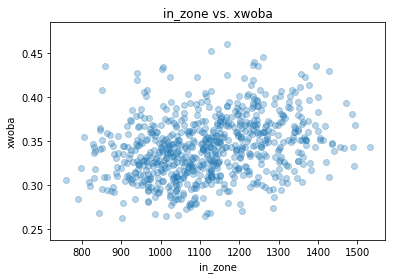

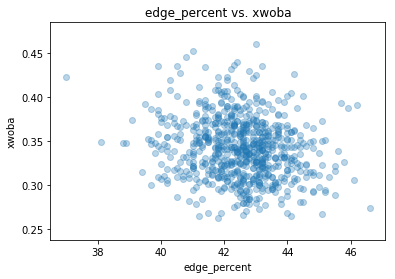

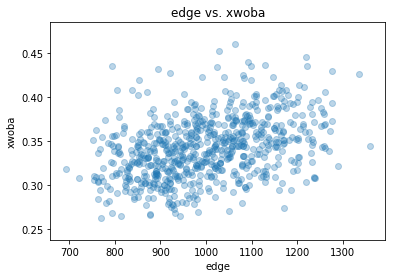

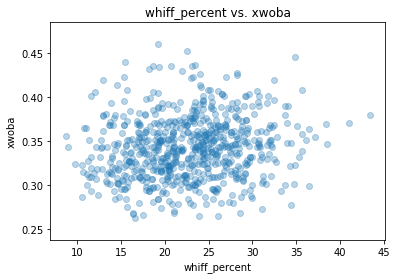

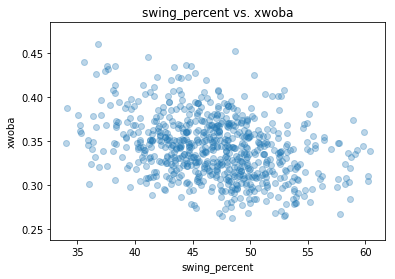

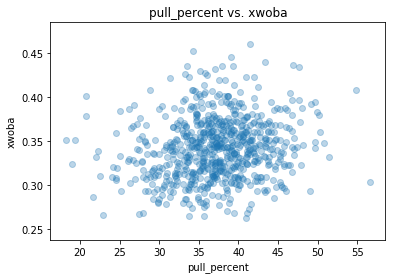

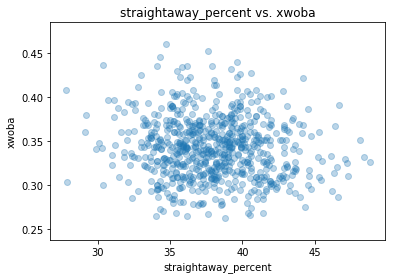

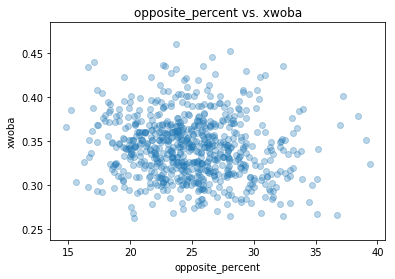

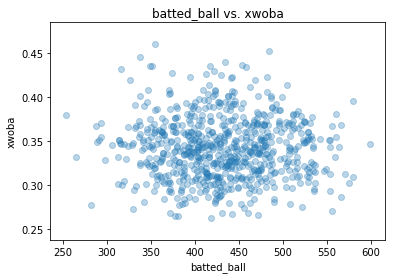

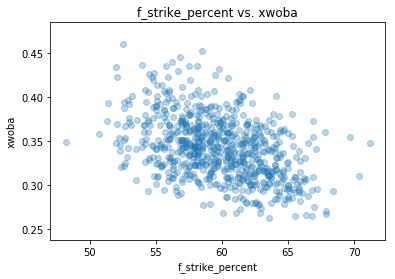

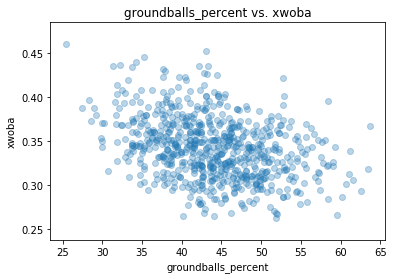

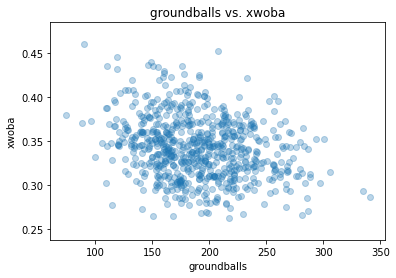

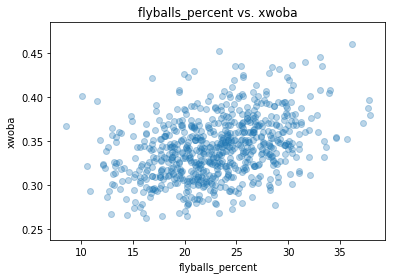

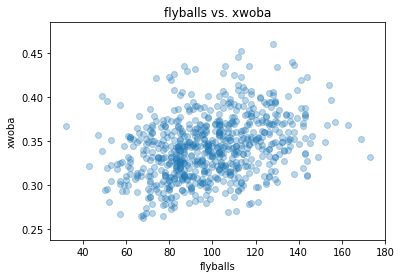

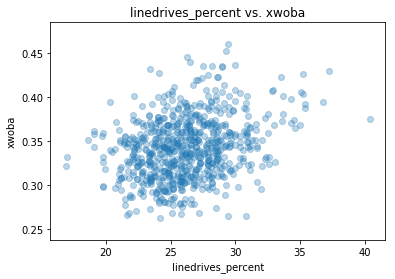

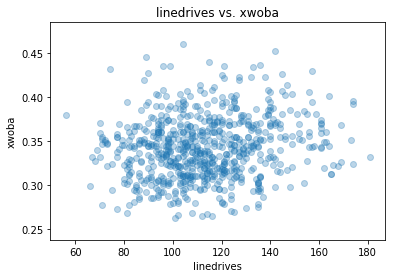

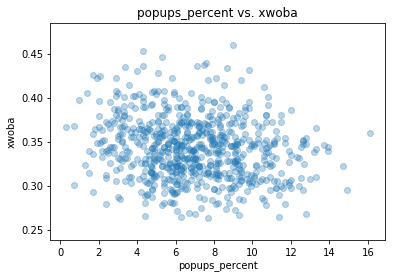

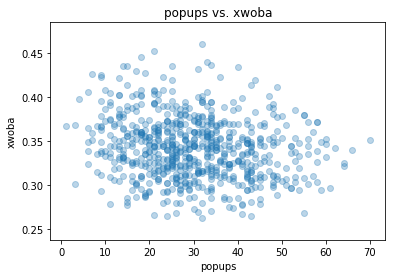

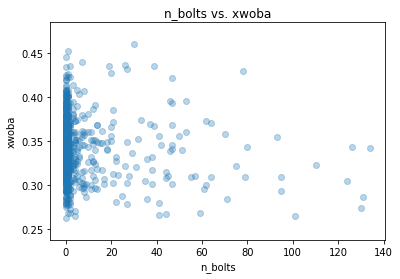

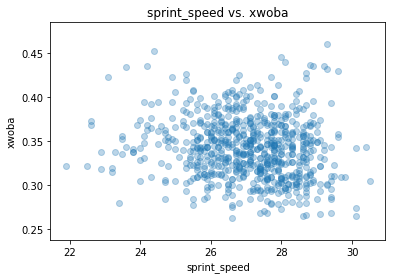

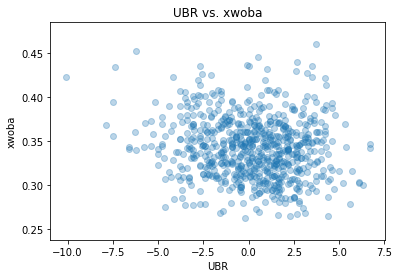

In [4]:
i = 0
for x in predictors:
    plt.figure(i)
    plt.scatter(data_all_years[x], data_all_years['xwoba'],alpha=0.3)
    plt.xlabel(x)
    plt.ylabel('xwoba')
    plt.title(x + ' vs. xwoba')
    i = i + 1

In [5]:
xwoba_preds = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','solidcontact_percent','poorlytopped_percent','hard_hit_percent','oz_swing_percent','out_zone','pitch_count','edge','swing_percent','f_strike_percent','groundballs_percent','flyballs_percent']])

In [6]:
xwoba_model = sm.OLS(data_all_years['xwoba'],xwoba_preds)
xwoba_model_results = xwoba_model.fit()
print(xwoba_model_results.tvalues)
print(xwoba_model_results.pvalues)

x1     19.227946
x2     -7.360267
x3     14.323688
x4      1.800635
x5     -7.425864
x6     -6.761956
x7     -6.236776
x8      1.696871
x9      0.367979
x10    -2.335170
x11     0.089323
x12    -1.558535
x13    -2.777982
x14    -4.117089
dtype: float64
x1     2.646771e-66
x2     5.235715e-13
x3     6.252194e-41
x4     7.219700e-02
x5     3.314188e-13
x6     2.903477e-11
x7     7.785152e-10
x8     9.017197e-02
x9     7.130017e-01
x10    1.982031e-02
x11    9.288511e-01
x12    1.195651e-01
x13    5.618401e-03
x14    4.301551e-05
dtype: float64


In [7]:
xwoba_preds2 = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels','poorlytopped_percent','hard_hit_percent','oz_swing_percent','edge','groundballs_percent','flyballs_percent']])

In [8]:
xwoba_model_red = sm.OLS(data_all_years['xwoba'],xwoba_preds2)
xwoba_model_red_results = xwoba_model_red.fit()
print(xwoba_model_red_results.tvalues)
print(xwoba_model_red_results.pvalues)

x1    20.962625
x2    -7.550653
x3    15.987794
x4    -7.765325
x5    -6.432841
x6   -11.328935
x7    -2.049584
x8    -3.159769
x9    -4.230948
dtype: float64
x1    5.495478e-76
x2    1.365116e-13
x3    3.149855e-49
x4    2.923683e-14
x5    2.330901e-10
x6    2.023726e-27
x7    4.077987e-02
x8    1.647421e-03
x9    2.639029e-05
dtype: float64


In [9]:
anovatest = anova_lm(xwoba_model_red_results, xwoba_model_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     695.0  0.216917      0.0       NaN       NaN       NaN
1     690.0  0.210888      5.0  0.006029  3.945019  0.001557


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [10]:
# ANOVA test shows that at least one of the predictors dropped from the original model was significant
# Continue with a larger reduced model
xwoba_preds3 = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','oz_swing_percent','edge','groundballs_percent','flyballs_percent']])
xwoba_model_red2 = sm.OLS(data_all_years['xwoba'],xwoba_preds3)
xwoba_model_red2_results = xwoba_model_red2.fit()
print(xwoba_model_red2_results.tvalues)
print(xwoba_model_red2_results.pvalues)

x1     20.746016
x2     -7.278089
x3     16.130353
x4      1.935045
x5     -7.460909
x6     -6.694239
x7    -11.477341
x8     -2.221035
x9     -2.959647
x10    -4.521323
dtype: float64
x1     9.358579e-75
x2     9.190494e-13
x3     6.030303e-50
x4     5.339072e-02
x5     2.576679e-13
x6     4.474855e-11
x7     4.847316e-28
x8     2.667057e-02
x9     3.184849e-03
x10    7.225463e-06
dtype: float64


In [11]:
anovatest = anova_lm(xwoba_model_red2_results, xwoba_model_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff       F    Pr(>F)
0     694.0  0.215753      0.0       NaN     NaN       NaN
1     690.0  0.210888      4.0  0.004865  3.9791  0.003361


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [12]:
# Still need a larger reduced model per the ANOVA test
xwoba_preds4 = numpy.array(data_all_years[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent']])
xwoba_model_red3 = sm.OLS(data_all_years['xwoba'],xwoba_preds4)
xwoba_model_red3_results = xwoba_model_red3.fit()
print(xwoba_model_red3_results.tvalues)
print(xwoba_model_red3_results.pvalues)

x1     20.799802
x2     -7.294949
x3     14.612641
x4      1.756566
x5     -7.452816
x6     -6.682987
x7      3.648306
x8    -12.123187
x9     -4.281188
x10    -2.822955
x11    -4.272574
dtype: float64
x1     4.935098e-75
x2     8.193681e-13
x3     2.369387e-42
x4     7.943337e-02
x5     2.731470e-13
x6     4.814758e-11
x7     2.837945e-04
x8     8.192225e-31
x9     2.121085e-05
x10    4.894819e-03
x11    2.202528e-05
dtype: float64


In [13]:
anovatest = anova_lm(xwoba_model_red3_results, xwoba_model_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     693.0  0.211687      0.0       NaN       NaN       NaN
1     690.0  0.210888      3.0  0.000799  0.871228  0.455628


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Checking to see if polynomial terms are significant predictors in the xwOBA model

In [14]:
data_all_mod = data_all_years.copy()
data_all_mod["exit_velocity_avg^2"] = data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"]
data_all_mod["launch_angle_avg^2"] = data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"]
data_all_mod["barrels^2"] = data_all_mod["barrels"] * data_all_mod["barrels"]
data_all_mod["solidcontact_percent^2"] = data_all_mod["solidcontact_percent"] * data_all_mod["solidcontact_percent"]
data_all_mod["poorlytopped_percent^2"] = data_all_mod["poorlytopped_percent"] * data_all_mod["poorlytopped_percent"]
data_all_mod["hard_hit_percent^2"] = data_all_mod["hard_hit_percent"] * data_all_mod["hard_hit_percent"]
data_all_mod["out_zone^2"] = data_all_mod["out_zone"] * data_all_mod["out_zone"]
data_all_mod["oz_swing_percent^2"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]
data_all_mod["edge^2"] = data_all_mod["edge"] * data_all_mod["edge"]
data_all_mod["groundballs_percent^2"] = data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"]
data_all_mod["flyballs_percent^2"] = data_all_mod["flyballs_percent"] * data_all_mod["flyballs_percent"]

data_all_mod["exit_velocity_avg^3"] = data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"] * data_all_mod["exit_velocity_avg"]
data_all_mod["launch_angle_avg^3"] = data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"] * data_all_mod["launch_angle_avg"]
data_all_mod["oz_swing_percent^3"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]
data_all_mod["groundballs_percent^3"] = data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"] * data_all_mod["groundballs_percent"]
data_all_mod["flyballs_percent^3"] = data_all_mod["flyballs_percent"] * data_all_mod["flyballs_percent"] * data_all_mod["flyballs_percent"]

data_all_mod["oz_swing_percent^4"] = data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"] * data_all_mod["oz_swing_percent"]

In [15]:
xwoba_poly_preds = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","barrels^2","solidcontact_percent^2","poorlytopped_percent^2","hard_hit_percent^2","out_zone^2","oz_swing_percent^2","edge^2","groundballs_percent^2","flyballs_percent^2"]])
xwoba_model_poly = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds)
xwoba_model_poly_results = xwoba_model_poly.fit()
print(xwoba_model_poly_results.tvalues)
print(xwoba_model_poly_results.pvalues)

x1     11.533019
x2      0.678499
x3      6.920352
x4      1.400519
x5     -2.114881
x6     -2.187264
x7      1.734574
x8     -5.802895
x9     -1.875080
x10    -3.052293
x11    -3.778956
x12    -7.703262
x13    -3.990397
x14    -1.116049
x15    -1.124964
x16     0.875738
x17     2.300772
x18    -1.130122
x19     3.609427
x20     1.219553
x21     2.351142
x22     2.606880
dtype: float64
x1     3.084229e-28
x2     4.976858e-01
x3     1.040422e-11
x4     1.618129e-01
x5     3.480218e-02
x6     2.906214e-02
x7     8.326805e-02
x8     9.982427e-09
x9     6.120879e-02
x10    2.359255e-03
x11    1.712634e-04
x12    4.684732e-14
x13    7.310616e-05
x14    2.647941e-01
x15    2.609999e-01
x16    3.814809e-01
x17    2.170534e-02
x18    2.588220e-01
x19    3.293465e-04
x20    2.230560e-01
x21    1.899958e-02
x22    9.336832e-03
dtype: float64


In [16]:
# Reduced polynomial model will include only the original 11 predictors and predictors x12, x13, x17, x19, x21, x22
# Will test to see if this reduced polynomial model is significantly different from the full polynomial model using an ANOVA test
xwoba_poly_preds2 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","hard_hit_percent^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2"]])
xwoba_model_poly2 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds2)
xwoba_model_poly2_results = xwoba_model_poly2.fit()
print(xwoba_model_poly2_results.tvalues)
print(xwoba_model_poly2_results.pvalues)

x1     13.472082
x2      0.197186
x3     14.782643
x4      1.386637
x5     -6.825375
x6     -1.269914
x7      4.790391
x8     -6.375481
x9     -5.565638
x10    -3.805436
x11    -3.552418
x12    -8.210534
x13    -3.575346
x14     1.494717
x15     4.165921
x16     2.992534
x17     2.376390
dtype: float64
x1     7.056977e-37
x2     8.437401e-01
x3     3.882653e-43
x4     1.660021e-01
x5     1.928943e-11
x6     2.045453e-01
x7     2.040491e-06
x8     3.346523e-10
x9     3.746728e-08
x10    1.541831e-04
x11    4.078061e-04
x12    1.090066e-15
x13    3.742768e-04
x14    1.354474e-01
x15    3.496416e-05
x16    2.865905e-03
x17    1.775606e-02
dtype: float64


In [17]:
# Will test to see if this reduced polynomial model is significantly different from the full polynomial model using an ANOVA test
anovatest = anova_lm(xwoba_model_poly2_results, xwoba_model_poly_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     687.0  0.187945      0.0       NaN       NaN       NaN
1     682.0  0.186421      5.0  0.001524  1.114991  0.350927


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [18]:
# No significant predictors were dropped from the first to the second polynomial model
# Before adding cubic terms, we will test to see if x14 can be dropped from the second polynomial model
xwoba_poly_preds3 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2"]])
xwoba_model_poly3 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds3)
xwoba_model_poly3_results = xwoba_model_poly3.fit()
print(xwoba_model_poly3_results.tvalues)
print(xwoba_model_poly3_results.pvalues)

x1     13.496837
x2      0.185836
x3     15.805137
x4      1.370030
x5     -7.004383
x6     -0.000017
x7      4.678403
x8     -6.342172
x9     -5.531900
x10    -3.748827
x11    -3.816052
x12    -8.093834
x13    -3.604789
x14     4.120440
x15     2.944937
x16     2.612672
dtype: float64
x1     5.342522e-37
x2     8.526285e-01
x3     3.109272e-48
x4     1.711244e-01
x5     5.917194e-12
x6     9.999860e-01
x7     3.481738e-06
x8     4.103505e-10
x9     4.504302e-08
x10    1.925930e-04
x11    1.478156e-04
x12    2.622835e-15
x13    3.349689e-04
x14    4.242345e-05
x15    3.339200e-03
x16    9.179910e-03
dtype: float64


In [19]:
# Will test to see if this dropping the hard_hit_percent^2 term results in a significantly different model
anovatest = anova_lm(xwoba_model_poly3_results, xwoba_model_poly2_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff        F    Pr(>F)
0     688.0  0.188556      0.0       NaN      NaN       NaN
1     687.0  0.187945      1.0  0.000611  2.23418  0.135447


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [20]:
# No significant difference between the model with hard_hit_percent^2 and the model without hard_hit_percent^2
# We will proceed with the third polynomial model (without hard_hit_percent^2) and add cubic terms to the model to check their significance
xwoba_poly_preds4 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","exit_velocity_avg^3","launch_angle_avg^3","oz_swing_percent^3","groundballs_percent^3","flyballs_percent^3"]])
xwoba_model_poly4 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds4)
xwoba_model_poly4_results = xwoba_model_poly4.fit()
print(xwoba_model_poly4_results.tvalues)
print(xwoba_model_poly4_results.pvalues)

x1      3.013787
x2      1.045164
x3     14.640810
x4      1.172828
x5     -6.861654
x6      0.580773
x7      4.794869
x8     -3.425945
x9     -5.595125
x10    -1.052335
x11    -3.160554
x12    -1.809843
x13    -2.082745
x14     2.587903
x15     0.612815
x16     2.600457
x17     1.335166
x18     1.348968
x19    -2.185962
x20    -0.344126
x21    -2.337326
dtype: float64
x1     2.675602e-03
x2     2.963171e-01
x3     2.047068e-42
x4     2.412736e-01
x5     1.528506e-11
x6     5.615851e-01
x7     1.999225e-06
x8     6.493530e-04
x9     3.192488e-08
x10    2.930178e-01
x11    1.644270e-03
x12    7.075949e-02
x13    3.764598e-02
x14    9.861504e-03
x15    5.402025e-01
x16    9.511346e-03
x17    1.822670e-01
x18    1.777942e-01
x19    2.915716e-02
x20    7.308577e-01
x21    1.971022e-02
dtype: float64


In [21]:
# Based on the p-values of the cubic terms, none of them appear to be significant.
# We will perform an ANOVA test comparing the third polynomial model and this polynomial model with cubic terms.
anovatest = anova_lm(xwoba_model_poly3_results, xwoba_model_poly4_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     688.0  0.188556      0.0       NaN       NaN       NaN
1     683.0  0.185345      5.0  0.003211  2.366777  0.038255


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


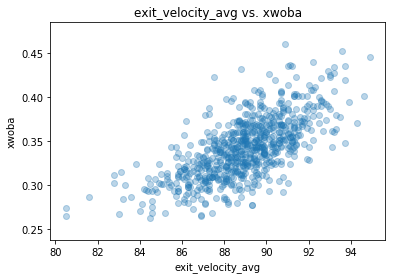

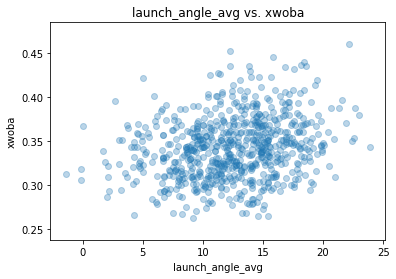

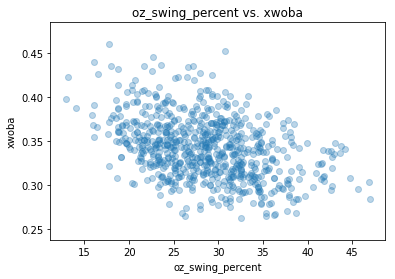

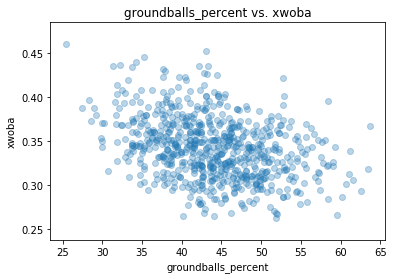

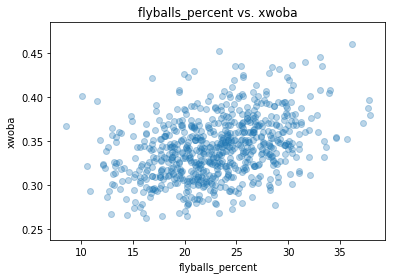

In [22]:
# Based on the low p-value of 0.038, it appears that one or more of the cubic terms are significant.
# We will now examine the scatterplots of exit_velocity_avg, launch_angle_avg, oz_swing_percent,groundballs_percent, and flyballs_percent to see which ones could have a significant cubic term in the xWOBA model.
possible_cubic_predictors_xwoba = data_all_years[["exit_velocity_avg","launch_angle_avg","oz_swing_percent","groundballs_percent","flyballs_percent"]]
i = 0
for x in possible_cubic_predictors_xwoba:
    plt.figure(i)
    plt.scatter(data_all_years[x], data_all_years['xwoba'],alpha=0.3)
    plt.xlabel(x)
    plt.ylabel('xwoba')
    plt.title(x + ' vs. xwoba')
    i = i + 1

In [23]:
# Based on these scatterplots, the relationship between exit_velocity_avg and xWOBA is most similar to the shape of y = x^3
# We will create a nested version of the cubic polynomial model in which exit_velocity_avg is the only predictor with a cubic term
xwoba_poly_preds5 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","exit_velocity_avg^3"]])
xwoba_model_poly5 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds5)
xwoba_model_poly5_results = xwoba_model_poly5.fit()
print(xwoba_model_poly5_results.tvalues)
print(xwoba_model_poly5_results.pvalues)

x1      2.782390
x2      0.210295
x3     14.746515
x4      1.399659
x5     -6.932681
x6      0.280308
x7      4.726234
x8     -6.360612
x9     -5.531109
x10    -3.808004
x11    -3.638314
x12    -1.329787
x13    -3.617234
x14     4.148907
x15     3.005308
x16     2.467872
x17     0.888412
dtype: float64
x1     5.544149e-03
x2     8.334996e-01
x3     5.831481e-43
x4     1.620668e-01
x5     9.535012e-12
x6     7.793254e-01
x7     2.775407e-06
x8     3.667232e-10
x9     4.526047e-08
x10    1.526243e-04
x11    2.949981e-04
x12    1.840299e-01
x13    3.195929e-04
x14    3.759749e-05
x15    2.749751e-03
x16    1.383445e-02
x17    3.746304e-01
dtype: float64


In [24]:
# ANOVA test to see if models 3 and 5 are significantly different
# This is testing if exit_velocity_avg^3 should be included in the final model
anovatest = anova_lm(xwoba_model_poly3_results, xwoba_model_poly5_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F   Pr(>F)
0     688.0  0.188556      0.0       NaN       NaN      NaN
1     687.0  0.188340      1.0  0.000216  0.789275  0.37463


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [25]:
# According to this p-value, exit_velocity_avg^3 is not significant.
# We will create a model with cubic a cubic term only for launch_angle_avg.
xwoba_poly_preds6 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","launch_angle_avg^3"]])
xwoba_model_poly6 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds6)
xwoba_model_poly6_results = xwoba_model_poly6.fit()
print(xwoba_model_poly6_results.tvalues)
print(xwoba_model_poly6_results.pvalues)

x1     13.447283
x2      0.917717
x3     15.832102
x4      1.365534
x5     -7.016957
x6      0.031714
x7      4.636422
x8     -6.248647
x9     -5.512417
x10    -3.829928
x11    -3.483087
x12    -8.079210
x13    -2.591386
x14     4.033896
x15     3.017800
x16     2.289831
x17     1.242410
dtype: float64
x1     9.203594e-37
x2     3.590890e-01
x3     2.321918e-48
x4     1.725323e-01
x5     5.447726e-12
x6     9.747092e-01
x7     4.243497e-06
x8     7.262422e-10
x9     5.011455e-08
x10    1.399061e-04
x11    5.270957e-04
x12    2.932656e-15
x13    9.762030e-03
x14    6.101388e-05
x15    2.640339e-03
x16    2.233340e-02
x17    2.145091e-01
dtype: float64


In [26]:
# ANOVA Test to see if models 3 and 6 are significantly different
# This is testing to see if launch_angle_avg^3 should be included in the final model
anovatest = anova_lm(xwoba_model_poly3_results, xwoba_model_poly6_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     688.0  0.188556      0.0       NaN       NaN       NaN
1     687.0  0.188133      1.0  0.000423  1.543584  0.214509


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [27]:
# This p-value of 0.21 is fairly low but probably not significant. We will proceed without
# launch_angle_avg^3. Now we will check the significance of oz_swing_percent^3.
xwoba_poly_preds7 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","oz_swing_percent^3"]])
xwoba_model_poly7 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds7)
xwoba_model_poly7_results = xwoba_model_poly7.fit()
print(xwoba_model_poly7_results.tvalues)
print(xwoba_model_poly7_results.pvalues)

x1     12.510629
x2      0.146873
x3     15.860938
x4      1.197603
x5     -6.925434
x6      0.176598
x7      4.700220
x8     -3.169626
x9     -5.563262
x10    -3.665146
x11    -3.785814
x12    -8.199251
x13    -3.519780
x14     2.318516
x15     2.863691
x16     2.577333
x17    -1.917849
dtype: float64
x1     1.690282e-32
x2     8.832750e-01
x3     1.659377e-48
x4     2.314846e-01
x5     1.000253e-11
x6     8.598764e-01
x7     3.140879e-06
x8     1.594114e-03
x9     3.795880e-08
x10    2.662590e-04
x11    1.666015e-04
x12    1.187396e-15
x13    4.604092e-04
x14    2.071394e-02
x15    4.315058e-03
x16    1.016396e-02
x17    5.554444e-02
dtype: float64


In [28]:
# ANOVA Test to see if models 3 and 7 are significantly different
# This is testing to see if oz_swing_percent^3 should be included in the final model.
anovatest = anova_lm(xwoba_model_poly3_results, xwoba_model_poly7_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F    Pr(>F)
0     688.0  0.188556      0.0       NaN       NaN       NaN
1     687.0  0.187552      1.0  0.001004  3.678145  0.055544


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [29]:
# The low p-value from the ANOVA test suggests that the oz_swing_percent^3 predictor is significant. We
# will proceed with this model, and check the remaining cubic terms.
# Checking model with cubic terms oz_swing_percent^3 and groundballs_percent^3
xwoba_poly_preds8 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","oz_swing_percent^3","groundballs_percent^3"]])
xwoba_model_poly8 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds8)
xwoba_model_poly8_results = xwoba_model_poly8.fit()
print(xwoba_model_poly8_results.tvalues)
print(xwoba_model_poly8_results.pvalues)

x1      7.998107
x2      0.104399
x3     15.846257
x4      1.223181
x5     -6.922184
x6      0.153608
x7      4.676771
x8     -3.124484
x9     -5.550094
x10    -1.698706
x11    -3.711805
x12    -6.393345
x13    -3.441769
x14     2.281739
x15     0.993238
x16     2.500999
x17    -1.887459
x18    -0.515199
dtype: float64
x1     5.380250e-15
x2     9.168831e-01
x3     2.013080e-48
x4     2.216813e-01
x5     1.023133e-11
x6     8.779640e-01
x7     3.510537e-06
x8     1.856231e-03
x9     4.081961e-08
x10    8.982797e-02
x11    2.224761e-04
x12    2.999972e-10
x13    6.129890e-04
x14    2.281022e-02
x15    3.209443e-01
x16    1.261642e-02
x17    5.952053e-02
x18    6.065801e-01
dtype: float64


In [30]:
# ANOVA Test to see if models 7 and 8 are significantly different
# This is testing to see if groundballs_percent^3 should be included in the final model.
anovatest = anova_lm(xwoba_model_poly7_results, xwoba_model_poly8_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff        F   Pr(>F)
0     687.0  0.187552      0.0       NaN      NaN      NaN
1     686.0  0.187479      1.0  0.000073  0.26543  0.60658


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [31]:
# The p-value from the ANOVA test suggests that there is not a significant difference between the model without groundballs_percent^3 and the model with it. Therefore, we will proceed with the model without groundballs_percent^3 and test the final cubic term, flyballs_percent^3
xwoba_poly_preds9 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","oz_swing_percent^3","flyballs_percent^3"]])
xwoba_model_poly9 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds9)
xwoba_model_poly9_results = xwoba_model_poly9.fit()
print(xwoba_model_poly9_results.tvalues)
print(xwoba_model_poly9_results.pvalues)

x1     12.059923
x2      0.096824
x3     15.808669
x4      1.158164
x5     -6.930358
x6      0.151718
x7      4.741346
x8     -3.295320
x9     -5.591712
x10    -3.499879
x11    -2.409265
x12    -8.236996
x13    -3.481158
x14     2.444422
x15     2.696545
x16     1.639535
x17    -2.038388
x18    -1.234281
dtype: float64
x1     1.644826e-30
x2     9.228947e-01
x3     3.117920e-48
x4     2.472000e-01
x5     9.693793e-12
x6     8.794536e-01
x7     2.582974e-06
x8     1.033680e-03
x9     3.247995e-08
x10    4.955739e-04
x11    1.624714e-02
x12    8.935960e-16
x13    5.308855e-04
x14    1.475913e-02
x15    7.178228e-03
x16    1.015604e-01
x17    4.189413e-02
x18    2.175208e-01
dtype: float64


In [32]:
# ANOVA Test to see if models 7 and 9 are significantly different
# This is testing to see if flyballs_percent^3 should be included in the final model.
anovatest = anova_lm(xwoba_model_poly7_results, xwoba_model_poly9_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff        F    Pr(>F)
0     687.0  0.187552      0.0       NaN      NaN       NaN
1     686.0  0.187136      1.0  0.000416  1.52345  0.217521

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [33]:
# The p-value from this ANOVA test suggests that flyballs_percent^3 is not significant. We now have to test the significance of the quartic term oz_swing_percent^4
xwoba_poly_preds10 = numpy.array(data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent',"exit_velocity_avg^2","launch_angle_avg^2","oz_swing_percent^2","groundballs_percent^2","flyballs_percent^2","oz_swing_percent^3","oz_swing_percent^4"]])
xwoba_model_poly10 = sm.OLS(data_all_mod['xwoba'],xwoba_poly_preds10)
xwoba_model_poly10_results = xwoba_model_poly10.fit()
print(xwoba_model_poly10_results.tvalues)
print(xwoba_model_poly10_results.pvalues)

x1      8.045283
x2      0.157118
x3     15.916730
x4      1.108054
x5     -6.970815
x6      0.131406
x7      4.579377
x8     -2.179040
x9     -5.403603
x10    -3.662956
x11    -3.824986
x12    -6.667746
x13    -3.529193
x14     1.785145
x15     2.861029
x16     2.598959
x17    -1.575159
x18     1.430426
dtype: float64
x1     3.786901e-15
x2     8.751978e-01
x3     8.852513e-49
x4     2.682269e-01
x5     7.415447e-12
x6     8.954926e-01
x7     5.538154e-06
x8     2.966822e-02
x9     9.019231e-08
x10    2.685311e-04
x11    1.427002e-04
x12    5.345891e-11
x13    4.446625e-04
x14    7.467956e-02
x15    4.351207e-03
x16    9.551648e-03
x17    1.156808e-01
x18    1.530501e-01
dtype: float64


In [34]:
# ANOVA Test to see if models 7 and 10 are significantly different
# This is testing to see if oz_swing_percent^4 should be included in the final model.
anovatest = anova_lm(xwoba_model_poly7_results, xwoba_model_poly10_results)
print(anovatest)

   df_resid       ssr  df_diff   ss_diff         F   Pr(>F)
0     687.0  0.187552      0.0       NaN       NaN      NaN
1     686.0  0.186994      1.0  0.000558  2.046118  0.15305


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


The p-value is fairly low. However, it is probably in the range where it is at our discretion to choose to include or exclude oz_swing_percent^4 from the model. We will choose to exclude it for the sake of model simplicity and avoiding the problem of overfitting the model.

# Final model
xwOBA ~ exit_velocity_avg + launch_angle_avg + barrels + solidcontact_percent + poorlytopped_percent + hard_hit_percent + out_zone + oz_swing_percent + edge + groundballs_percent + flyballs_percent + exit_velocity_avg^2 + launch_angle_avg^2 + oz_swing_percent^2 + groundballs_percent^2 + flyballs_percent^2 + oz_swing_percent^3

In [36]:
da_xwoba = data_all_mod[['exit_velocity_avg','launch_angle_avg','barrels', 'solidcontact_percent','poorlytopped_percent','hard_hit_percent','out_zone','oz_swing_percent','edge','groundballs_percent','flyballs_percent','exit_velocity_avg^2','launch_angle_avg^2','oz_swing_percent^2','groundballs_percent^2','flyballs_percent^2','oz_swing_percent^3']]

In [37]:
xwoba_design_matrix = numpy.zeros([len(data_all_years),17])
for x in range(0,len(data_all_years)):
    xwoba_design_matrix[x] = numpy.array(da_xwoba.iloc[x])

In [38]:
xwoba_fitted = xwoba_model_poly7_results.predict(xwoba_design_matrix)

In [58]:
xwoba_percent_error = pandas.DataFrame(columns=['Last Name','First Name','Year','Predicted Value','Actual Value','Residual','Percent Error'])
xwoba_percent_error['Last Name'] = data_all_years['last_name']
xwoba_percent_error['First Name'] = data_all_years['first_name']
xwoba_percent_error['Year'] = data_all_years['year']
xwoba_percent_error['Predicted Value'] = xwoba_fitted
xwoba_percent_error['Actual Value'] = data_all_years['xwoba']
xwoba_percent_error['Residual'] = xwoba_percent_error['Actual Value'] - xwoba_percent_error['Predicted Value']
xwoba_percent_error['Percent Error'] = (abs((xwoba_percent_error['Predicted Value'] - xwoba_percent_error['Actual Value']))/xwoba_percent_error['Predicted Value'])*100

In [61]:
pe_bin_cutoffs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]

Text(0,0.5,'Number of Observations')

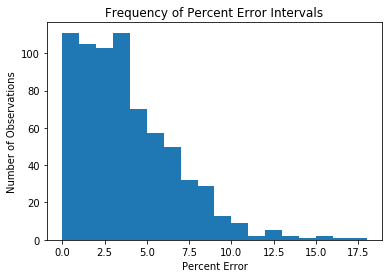

In [62]:
plt.hist(xwoba_percent_error['Percent Error'],bins=pe_bin_cutoffs)
plt.title('Frequency of Percent Error Intervals')
plt.xlabel('Percent Error')
plt.ylabel('Number of Observations')

In [66]:
xwoba_percent_error.head()

,Last Name,First Name,Year,Predicted Value,Actual Value,Residual,Percent Error
0,Abreu,Jose,2015.0,0.362363,0.342,-0.020363,5.619537
1,Altuve,Jose,2015.0,0.307773,0.310,0.002227,0.723648
2,Andrus,Elvis,2015.0,0.304371,0.296,-0.008371,2.750362
3,Arenado,Nolan,2015.0,0.373175,0.345,-0.028175,7.550117
4,Aybar,Erick,2015.0,0.294127,0.303,0.008873,3.016566


In [49]:
num_overestimates = 0
num_underestimates = 0
one_percent = 0
three_percent = 0
five_percent = 0
ten_percent = 0
gt_ten_percent = 0
for row in range(0,len(xwoba_percent_error)):
    if (xwoba_percent_error['Residual'][row] < 0):
        num_overestimates = num_overestimates + 1
    if (xwoba_percent_error['Residual'][row] > 0):
        num_underestimates = num_underestimates + 1
    if (abs(xwoba_percent_error['Percent Error'][row]) < 1):
        one_percent = one_percent + 1
    if (1 < abs(xwoba_percent_error['Percent Error'][row]) < 3):
        three_percent = three_percent + 1
    if (3 < abs(xwoba_percent_error['Percent Error'][row]) < 5):
        five_percent = five_percent + 1
    if (5 < abs(xwoba_percent_error['Percent Error'][row]) < 10):
        ten_percent = ten_percent + 1
    if (abs(xwoba_percent_error['Percent Error'][row]) > 10):
        gt_ten_percent = gt_ten_percent + 1

percent_overestimated = round((num_overestimates/len(xwoba_percent_error))*100,2)
print("Percent of observations which were overestimated: " + str(percent_overestimated))
percent_underestimated = round((num_underestimates/len(xwoba_percent_error))*100,2)
print("Percent of observations which were underestimated: " + str(percent_underestimated))
one_percent_p = round((one_percent/len(xwoba_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than one percent: " + str(one_percent_p))
three_percent_p = round((three_percent/len(xwoba_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than three percent: " + str(three_percent_p))
five_percent_p = round((five_percent/len(xwoba_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than five percent: " + str(five_percent_p))
ten_percent_p = round((ten_percent/len(xwoba_percent_error))*100,2)
print("Percent of observations with absolute value of percent error less than ten percent: " + str(ten_percent_p))
gt_ten_percent_p = round((gt_ten_percent/len(xwoba_percent_error))*100,2)
print("Percent of observations with absolute value of percent error greater than ten percent: " + str(gt_ten_percent_p))


Percent of observations which were overestimated: 50.43
Percent of observations which were underestimated: 49.57
Percent of observations with absolute value of percent error less than one percent: 15.77
Percent of observations with absolute value of percent error less than three percent: 29.55
Percent of observations with absolute value of percent error less than five percent: 25.71
Percent of observations with absolute value of percent error less than ten percent: 25.71
Percent of observations with absolute value of percent error greater than ten percent: 3.27


In [52]:
r_bin_cutoffs = [-0.065, -0.060, -0.055, -0.050, -0.045, -0.040, -0.035, -0.030, -0.025, -0.020, -0.015, -0.010, -0.005, 0, 0.005, 0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040, 0.045, 0.050, 0.055,0.060, 0.065]

Text(0,0.5,'Number of Observations')

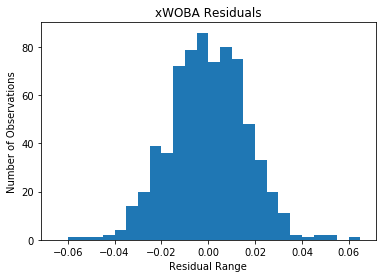

In [67]:
plt.hist(xwoba_percent_error['Residual'],bins=r_bin_cutoffs)
plt.title('xWOBA Residuals')
plt.xlabel('Residual Range')
plt.ylabel('Number of Observations')

In [69]:
print("Maximum residual for xWOBA model: " + str(round(xwoba_percent_error['Residual'].max(),4)))

Maximum residual for xWOBA model: 0.0618


In [70]:
print("Minimum residual for xWOBA model: " + str(round(xwoba_percent_error['Residual'].min(),4)))

Minimum residual for xWOBA model: -0.0561


In [56]:
residual_g1 = 0
residual_g2 = 0
residual_g3 = 0
residual_g4 = 0
residual_g5 = 0
residual_g6 = 0
residual_g7 = 0
residual_g8 = 0
for row in range(0,len(xwoba_percent_error)):
    if (abs(xwoba_percent_error['Residual'][row]) < 0.005):
        residual_g1 = residual_g1 + 1
    if (0.005 < abs(xwoba_percent_error['Residual'][row]) < 0.01):
        residual_g2 = residual_g2 + 1
    if (0.01 < abs(xwoba_percent_error['Residual'][row]) < 0.015):
        residual_g3 = residual_g3 + 1
    if (0.015 < abs(xwoba_percent_error['Residual'][row]) < 0.02):
        residual_g4 = residual_g4 + 1
    if (0.02 < abs(xwoba_percent_error['Residual'][row]) < 0.025):
        residual_g5 = residual_g5 + 1
    if (0.025 < abs(xwoba_percent_error['Residual'][row]) < 0.03):
        residual_g6 = residual_g6 + 1
    if (0.03 < abs(xwoba_percent_error['Residual'][row]) < 0.04):
        residual_g7 = residual_g7 + 1
    if (0.04 < abs(xwoba_percent_error['Residual'][row])):
        residual_g8 = residual_g8 + 1

residual_g1_p = round((residual_g1/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual less than 0.005: " + str(residual_g1_p))
residual_g2_p = round((residual_g2/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.005 and 0.01: " + str(residual_g2_p))
residual_g3_p = round((residual_g3/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.01 and 0.015: " + str(residual_g3_p))
residual_g4_p = round((residual_g4/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.015 and 0.02: " + str(residual_g4_p))
residual_g5_p = round((residual_g5/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.02 and 0.025: " + str(residual_g5_p))
residual_g6_p = round((residual_g6/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.025 and 0.03: " + str(residual_g6_p))
residual_g7_p = round((residual_g7/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual between 0.03 and 0.04: " + str(residual_g7_p))
residual_g8_p = round((residual_g8/len(xwoba_percent_error))*100,2)
print("Percent of observations with residual greater than 0.04: " + str(residual_g8_p))


Percent of observations with residual less than 0.005: 22.73
Percent of observations with residual between 0.005 and 0.01: 22.59
Percent of observations with residual between 0.01 and 0.015: 20.88
Percent of observations with residual between 0.015 and 0.02: 11.93
Percent of observations with residual between 0.02 and 0.025: 10.23
Percent of observations with residual between 0.025 and 0.03: 5.68
Percent of observations with residual between 0.03 and 0.04: 4.4
Percent of observations with residual greater than 0.04: 1.56


We are very satisfied with our xWOBA model. About 65% of observations have a residual less than 0.015, which is a pretty accurate result. Additionally, almost all of the observations had a low percent error. Out of all the models we built, this one is the most accurate, and we feel that it is accurate in predicting xWOBA values based on Statcast statistics.